# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
city_data_df

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
...,...,...,...
115,Bradshawfurt,7,Rural
116,New Ryantown,2,Rural
117,Randallchester,9,Rural
118,Jessicaport,1,Rural


In [4]:
ride_data_df

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277


In [5]:
#  1. Get the total rides for each city type
total_rides_citytype = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides_citytype

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [6]:
# 2. Get the total drivers for each city type
total_drivers_citytype = city_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers_citytype

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [7]:
#  3. Get the total amount of fares for each city type
total_fares_citytype = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares_citytype

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [8]:
#  4. Get the average fare per ride for each city type. 
avg_fare_ride = pyber_data_df.groupby(["type"]).mean()["fare"]
avg_fare_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [9]:
# 5. Get the average fare per driver for each city type. 
avg_fare_driver = total_fares_citytype / total_drivers_citytype
avg_fare_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [10]:
#  6. Create a PyBer summary DataFrame. 
# data = {'Total Rides': [125, 625, 1625], 'Total Drivers': [78, 490, 2405], 'Total Fares': [4327.93, 19356.33, 39854.38], 'Average Fare per Ride': [34.623440, 30.970128, 24.525772],
#        'Average Fare per Driver': [55.486282, 39.502714, 24.525772]}
pyber_summary_df = pd.DataFrame({'Total Rides': total_rides_citytype, 'Total Drivers': total_drivers_citytype, 'Total Fares': total_fares_citytype, 
                                 'Average Fare per Ride': avg_fare_ride, 'Average Fare per Driver': avg_fare_driver})
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [11]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [12]:
#  8. Format the columns.
pd.options.display.float_format = '${:,.2f}'.format
pyber_summary_df 

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [13]:
# 1. Read the merged DataFrame
pyber_data_df = pyber_data_df.rename(columns={'city': "City", 'date': "Date", 'fare': "Fare($USD)", 'ride_id': "Ride ID", 'driver_count': "# of Drivers",
                                     'type': "Type"})
pyber_data_df.head(10)

,City,Date,Fare($USD),Ride ID,# of Drivers,Type
0,Lake Jonathanshire,2019-01-14 10:14:22,$13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,$30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,$33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,$23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,$34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,$9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,$43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,$35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,$35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,$42.81,5327642267789,33,Urban


In [14]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
fare_sums_df = pyber_data_df.groupby(['Type', 'Date']).sum() # ['Fare($USD)']
fare_sums_df.loc[:, ['Fare($USD)']]
fare_sums_df

Fare($USD)        Ride ID  # of Drivers
Type  Date                                                        
Rural 2019-01-01 09:45:36      $43.69  2424875833354             1
      2019-01-02 11:18:32      $52.12  3454018971635             1
      2019-01-03 19:51:01      $19.90  5559509612597             8
      2019-01-04 03:31:26      $24.88  4195619112933             8
      2019-01-06 07:38:40      $47.33  3849747342021             4
...                               ...            ...           ...
Urban 2019-05-08 04:20:00      $21.99   117997692054            52
      2019-05-08 04:39:49      $18.45  1811574736337            11
      2019-05-08 07:29:01      $18.55  5682021476085            33
      2019-05-08 11:38:35      $19.77  7837163332630             4
      2019-05-08 13:10:18      $18.04  5616262558026            58

[2375 rows x 3 columns]

In [15]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
pyber_data_df.reset_index()

,index,City,Date,Fare($USD),Ride ID,# of Drivers,Type
0,0,Lake Jonathanshire,2019-01-14 10:14:22,$13.83,5739410935873,5,Urban
1,1,South Michelleport,2019-03-04 18:24:09,$30.24,2343912425577,72,Urban
2,2,Port Samanthamouth,2019-02-24 04:29:00,$33.44,2005065760003,57,Urban
3,3,Rodneyfort,2019-02-10 23:22:03,$23.44,5149245426178,34,Urban
4,4,South Jack,2019-03-06 04:28:35,$34.58,3908451377344,46,Urban
...,...,...,...,...,...,...,...
2370,2370,Michaelberg,2019-04-29 17:04:39,$13.38,8550365057598,6,Rural
2371,2371,Lake Latoyabury,2019-01-30 00:05:47,$20.76,9018727594352,2,Rural
2372,2372,North Jaime,2019-02-10 21:03:50,$11.11,2781339863778,1,Rural
2373,2373,West Heather,2019-05-07 19:22:15,$44.94,4256853490277,4,Rural


In [16]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 

pivot_table_df = pyber_data_df.pivot_table(values='Fare($USD)', index='Date', columns='Type', aggfunc='sum')
pivot_table_df

Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,$37.91
2019-01-01 00:46:46,NaN,$47.74,NaN
2019-01-01 02:07:24,NaN,$24.07,NaN
2019-01-01 03:46:50,NaN,NaN,$7.57
2019-01-01 05:23:21,NaN,NaN,$10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,$21.99
2019-05-08 04:39:49,NaN,NaN,$18.45
2019-05-08 07:29:01,NaN,NaN,$18.55


In [17]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

# date_filter_df = pivot_table_df.loc['2019-01-01':'2019-04-29']
# date_filter_df


In [18]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
pivot_table_df.index= pd.to_datetime(pivot_table_df.index)

In [19]:
# 7. Check that the datatype for the index is datetime using df.info()
pyber_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2375 entries, 0 to 2374
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          2375 non-null   object 
 1   Date          2375 non-null   object 
 2   Fare($USD)    2375 non-null   float64
 3   Ride ID       2375 non-null   int64  
 4   # of Drivers  2375 non-null   int64  
 5   Type          2375 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 129.9+ KB


In [20]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
weekly_fares_df = pivot_table_df.resample('W').sum()
weekly_fares_df

Type,Rural,Suburban,Urban
Date,,,
2019-01-06,$187.92,$721.60,"$1,661.68"
2019-01-13,$67.65,"$1,105.13","$2,050.43"
2019-01-20,$306.00,"$1,218.20","$1,939.02"
2019-01-27,$179.69,"$1,203.28","$2,129.51"
2019-02-03,$333.08,"$1,042.79","$2,086.94"
2019-02-10,$115.80,$974.34,"$2,162.64"
2019-02-17,$95.82,"$1,045.50","$2,235.07"
2019-02-24,$419.06,"$1,412.74","$2,466.29"
2019-03-03,$175.14,$858.46,"$2,218.20"


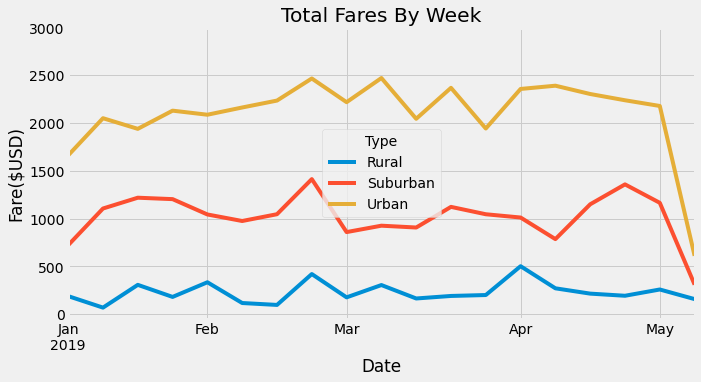

In [21]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.

style.use('fivethirtyeight')
ax = weekly_fares_df.plot(figsize=(10, 5))
# fig, ax = plt.subplots()

# x_labels = ["Jan", "Feb", "Mar", "April", "May"]
ax.set_title('Total Fares By Week')
ax.set_xlabel('Date')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 3001, step=500.0))


plt.savefig("analysis/Pyber_fare_summary.png")

# weekly_fares_df.plot(figsize=(10, 5))

# ax = weekly_fares_df.plot(figsize=(10, 5))



